In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
from scipy.stats import gaussian_kde

In [3]:
collisions = pd.read_csv('collisions.csv', low_memory=False)

In [35]:
collisions = collisions[pd.notnull(collisions['LONGITUDE'])]
collisions = collisions[pd.notnull(collisions['LATITUDE'])]

In [10]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.866047, -73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63347, -74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.728416, -73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.748928, -73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.766445, -73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN


In [36]:
xmin = -74.3
xmax = -73.69
ymin = 40.49
ymax = 40.92

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([collisions['LONGITUDE'], collisions['LATITUDE']])
kernel = stats.gaussian_kde(values)

In [46]:
Z = np.reshape(kernel(positions).T, X.shape)

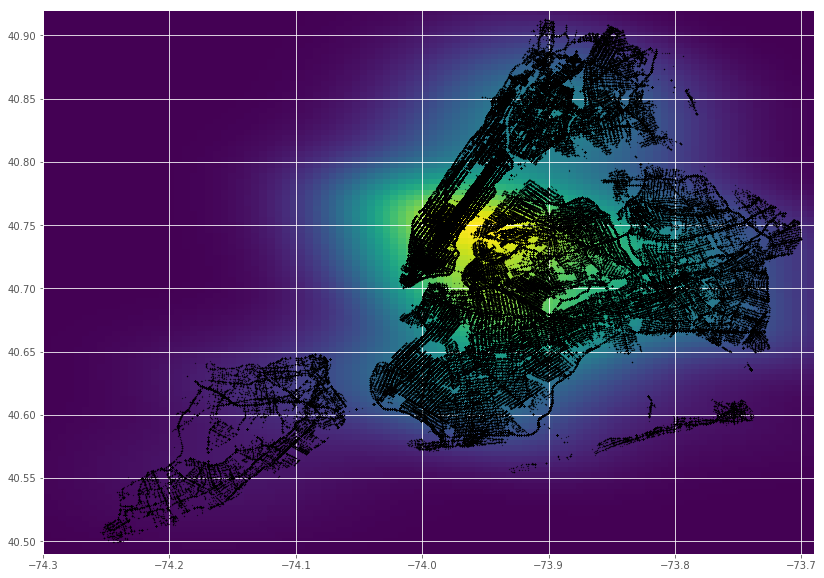

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), extent=[xmin, xmax, ymin, ymax])
ax.plot(collisions['LONGITUDE'], collisions['LATITUDE'], 'k.', markersize=0.5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()